In [1]:
import torch 

chunks = torch.load("embedded_chunks.pt")

In [2]:
import numpy as np 
chunking_embs = []

for idx, chunk in enumerate(chunks):
    if not idx: chunk = chunk[:, 1:, :] # remove special token
    if idx == len(chunks)-1: chunk = chunk[:, :-1, :] # remove special token
    chunking_embs.append(np.mean(chunk[0], axis=0))


(2545, 2545)


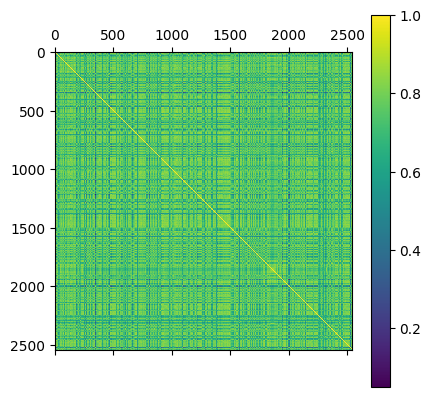

In [3]:
import numpy as np 
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt 
plt.style.use('default')

similarity_matrix = cosine_similarity(chunking_embs)
print(similarity_matrix.shape)
plt.matshow(similarity_matrix)
plt.colorbar()

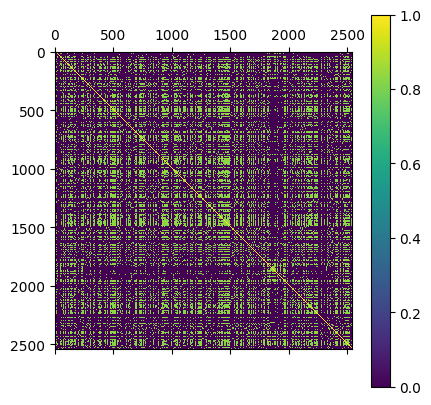

In [4]:
threshold = 0.8
thresholded_matrix = np.where(similarity_matrix >= threshold, similarity_matrix, 0)
plt.matshow(thresholded_matrix)
plt.colorbar()